In [16]:
import logging
import time
from pathlib import Path

import torch

from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
from lerobot.common.policies.smolvla.modeling_smolvla import SmolVLAPolicy
from lerobot.common.utils.utils import get_safe_torch_device, init_logging

init_logging()

In [17]:
model_path = "outputs/train/kuka_smolvla/checkpoints/020000/pretrained_model"  # Path to trained model
dataset_repo_id = "lerobot/stanford_kuka_multimodal_dataset"
device_name = "cuda"
num_samples = 5

In [18]:
device = get_safe_torch_device(device_name, log=True)
logging.info(f"Loading dataset: {dataset_repo_id}")
dataset = LeRobotDataset(dataset_repo_id)

INFO 2025-06-29 00:20:40 /767762878.py:2 Loading dataset: lerobot/stanford_kuka_multimodal_dataset


Resolving data files:   0%|          | 0/3000 [00:00<?, ?it/s]

In [19]:
print(f"Dataset size: {len(dataset)}")
print(f"device: {device}")

Dataset size: 149985
device: cuda


In [20]:
# print a sample from the dataset
sample = dataset[100]
#print(f"Sample: {sample}")
# print the keys of the sample
print(f"Sample keys: {sample.keys()}")
# print shapes and types of the sample
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: shape={value.shape}, dtype={value.dtype}")
    else:
        print(f"{key}: type={type(value)}")
# Other than keys 'observation.images.up', 'observation.images.side' print the values

print("=" * 20)
for key, value in sample.items():
    if key not in ['observation.images.up', 'observation.images.side']:
        print(f"{key}: {value}")
print("=" * 20)

# print a sample from the dataset
sample = dataset[101]
#print(f"Sample: {sample}")
# print the keys of the sample
print(f"Sample keys: {sample.keys()}")
# print shapes and types of the sample
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: shape={value.shape}, dtype={value.dtype}")
    else:
        print(f"{key}: type={type(value)}")
# Other than keys 'observation.images.up', 'observation.images.side' print the values

print("=" * 20)
for key, value in sample.items():
    if key not in ['observation.images.up', 'observation.images.side']:
        print(f"{key}: {value}")

Sample keys: dict_keys(['observation.images.image', 'observation.state', 'action', 'timestamp', 'episode_index', 'frame_index', 'next.reward', 'next.done', 'index', 'task_index', 'task'])
observation.images.image: shape=torch.Size([3, 128, 128]), dtype=torch.float32
observation.state: shape=torch.Size([7]), dtype=torch.float32
action: shape=torch.Size([7]), dtype=torch.float32
timestamp: shape=torch.Size([]), dtype=torch.float32
episode_index: shape=torch.Size([]), dtype=torch.int64
frame_index: shape=torch.Size([]), dtype=torch.int64
next.reward: shape=torch.Size([]), dtype=torch.float32
next.done: shape=torch.Size([]), dtype=torch.bool
index: shape=torch.Size([]), dtype=torch.int64
task_index: shape=torch.Size([]), dtype=torch.int64
task: type=<class 'str'>
observation.images.image: tensor([[[0.5765, 0.5490, 0.5255,  ..., 0.5490, 0.5569, 0.5608],
         [0.5765, 0.5451, 0.5098,  ..., 0.5451, 0.5569, 0.5569],
         [0.5725, 0.5451, 0.5098,  ..., 0.5490, 0.5569, 0.5569],
         

Image shape: torch.Size([3, 128, 128]), dtype: torch.float32


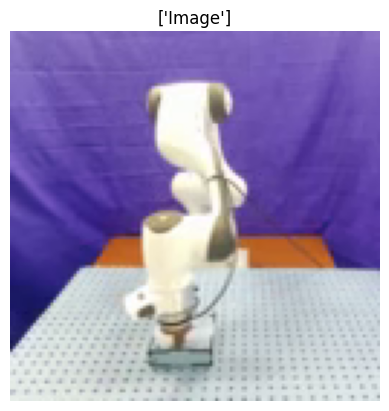

In [30]:
# Show the images
import matplotlib.pyplot as plt

def show_images(images, titles=None):
    """Display a list of images with optional titles."""
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis("off")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

def show_single_image(image, title=None):
    """Display a single image with an optional title."""
    plt.imshow(image)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

# Show the images from the sample
# up_image = sample['observation.images.up']
# side_image = sample['observation.images.side']
# show_images([up_image.permute(1, 2, 0).cpu().numpy(), 
#              side_image.permute(1, 2, 0).cpu().numpy()],
#             titles=['Up Image', 'Side Image'])  
image = sample['observation.images.image']
print(f"Image shape: {image.shape}, dtype: {image.dtype}")
# Image shape: torch.Size([3, 128, 128]), dtype: torch.float32

# Show the image
show_single_image(image.permute(1, 2, 0).cpu().numpy(),
            title=['Image'])

In [31]:
policy = SmolVLAPolicy.from_pretrained(model_path)
policy.to(device)
policy.eval()

INFO 2025-06-29 00:25:09 modeling.py:991 We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading  HuggingFaceTB/SmolVLM2-500M-Video-Instruct weights ...
Reducing the number of VLM layers to 16 ...
Loading weights from local directory


SmolVLAPolicy(
  (normalize_inputs): Normalize(
    (buffer_observation_state): ParameterDict(
        (mean): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
        (std): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
    )
  )
  (normalize_targets): Normalize(
    (buffer_action): ParameterDict(
        (mean): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
        (std): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
    )
  )
  (unnormalize_outputs): Unnormalize(
    (buffer_action): ParameterDict(
        (mean): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
        (std): Parameter containing: [torch.cuda.FloatTensor of size 7 (cuda:0)]
    )
  )
  (model): VLAFlowMatching(
    (vlm_with_expert): SmolVLMWithExpertModel(
      (vlm): SmolVLMForConditionalGeneration(
        (model): SmolVLMModel(
          (vision_model): SmolVLMVisionTransformer(
            (embeddings): SmolVLMVisio

In [32]:
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=1,
        shuffle=True,
        num_workers=0,
    )

In [33]:
# print dataloader values
for i, batch in enumerate(dataloader):
    if i >= num_samples:
        break
    print(f"Batch {i}: {batch}")
    # print shapes and types of the batch
    for key, value in batch.items():
        if isinstance(value, torch.Tensor):
            print(f"{key}: shape={value.shape}, dtype={value.dtype}")
        else:
            print(f"{key}: type={type(value)}")
    print("=" * 20)


Batch 0: {'observation.images.image': tensor([[[[0.6157, 0.5686, 0.5294,  ..., 0.5725, 0.5725, 0.5608],
          [0.5686, 0.5529, 0.5255,  ..., 0.5608, 0.5608, 0.5451],
          [0.5608, 0.5569, 0.5451,  ..., 0.5647, 0.5608, 0.5569],
          ...,
          [0.8157, 0.8314, 0.9137,  ..., 0.8706, 0.8549, 0.8392],
          [0.9098, 0.9059, 0.9137,  ..., 0.8784, 0.8000, 0.6157],
          [0.9098, 0.9020, 0.9137,  ..., 0.8706, 0.8549, 0.8392]],

         [[0.5294, 0.4824, 0.4431,  ..., 0.4745, 0.4745, 0.4627],
          [0.4824, 0.4667, 0.4392,  ..., 0.4627, 0.4627, 0.4471],
          [0.4745, 0.4706, 0.4588,  ..., 0.4667, 0.4627, 0.4588],
          ...,
          [0.8431, 0.8588, 0.9412,  ..., 0.9059, 0.8902, 0.8745],
          [0.9373, 0.9333, 0.9412,  ..., 0.9137, 0.8353, 0.6510],
          [0.9373, 0.9294, 0.9412,  ..., 0.9059, 0.8902, 0.8745]],

         [[0.8275, 0.7804, 0.7412,  ..., 0.7882, 0.7882, 0.7765],
          [0.7804, 0.7647, 0.7373,  ..., 0.7765, 0.7765, 0.7608],
    

In [34]:
for i, batch in enumerate(dataloader):
    print(batch)
    break

{'observation.images.image': tensor([[[[0.6000, 0.5647, 0.5333,  ..., 0.5686, 0.5725, 0.5725],
          [0.5922, 0.5647, 0.5294,  ..., 0.5686, 0.5686, 0.5686],
          [0.5843, 0.5608, 0.5333,  ..., 0.5608, 0.5608, 0.5608],
          ...,
          [0.8157, 0.8471, 0.9294,  ..., 0.8824, 0.8667, 0.8353],
          [0.9137, 0.9176, 0.9294,  ..., 0.8902, 0.8275, 0.5922],
          [0.9176, 0.9137, 0.9255,  ..., 0.8745, 0.8667, 0.8471]],

         [[0.5098, 0.4745, 0.4431,  ..., 0.4706, 0.4745, 0.4745],
          [0.5020, 0.4745, 0.4392,  ..., 0.4706, 0.4706, 0.4706],
          [0.4941, 0.4706, 0.4431,  ..., 0.4627, 0.4627, 0.4627],
          ...,
          [0.8392, 0.8706, 0.9529,  ..., 0.9176, 0.9020, 0.8706],
          [0.9412, 0.9451, 0.9569,  ..., 0.9255, 0.8627, 0.6275],
          [0.9451, 0.9412, 0.9529,  ..., 0.9098, 0.9020, 0.8824]],

         [[0.8196, 0.7843, 0.7529,  ..., 0.7843, 0.7882, 0.7882],
          [0.8118, 0.7843, 0.7490,  ..., 0.7843, 0.7843, 0.7843],
          [0.

In [35]:
#TODO check this feels wrong, shouldnt each batch be an episode? or like shouldn't the frames be one after the other?
# they are shuffled at the frame level, so each batch is a random selection of frames from different episodes, 
# An episode containes multiple frames, indexed by timestamp and index_frame, each frame contains observation.images.* , observation.state and action (ground truth)

In [36]:
batch['action'][0]

tensor([-0.0475, -0.0088, -0.0084,  0.0000,  0.0000,  0.0000, -0.0136])

In [37]:
policy.reset()

In [38]:
obs_batch = {}
for key in batch:
    if isinstance(batch[key], torch.Tensor):
        batch[key] = batch[key].to(device, non_blocking=True)

    if key.startswith("observation.") or key == "task":
        obs_batch[key] = batch[key]

print(f"Observation batch keys: {obs_batch.keys()}")

Observation batch keys: dict_keys(['observation.images.image', 'observation.state', 'task'])


In [39]:
obs_batch

{'observation.images.image': tensor([[[[0.6000, 0.5647, 0.5333,  ..., 0.5686, 0.5725, 0.5725],
           [0.5922, 0.5647, 0.5294,  ..., 0.5686, 0.5686, 0.5686],
           [0.5843, 0.5608, 0.5333,  ..., 0.5608, 0.5608, 0.5608],
           ...,
           [0.8157, 0.8471, 0.9294,  ..., 0.8824, 0.8667, 0.8353],
           [0.9137, 0.9176, 0.9294,  ..., 0.8902, 0.8275, 0.5922],
           [0.9176, 0.9137, 0.9255,  ..., 0.8745, 0.8667, 0.8471]],
 
          [[0.5098, 0.4745, 0.4431,  ..., 0.4706, 0.4745, 0.4745],
           [0.5020, 0.4745, 0.4392,  ..., 0.4706, 0.4706, 0.4706],
           [0.4941, 0.4706, 0.4431,  ..., 0.4627, 0.4627, 0.4627],
           ...,
           [0.8392, 0.8706, 0.9529,  ..., 0.9176, 0.9020, 0.8706],
           [0.9412, 0.9451, 0.9569,  ..., 0.9255, 0.8627, 0.6275],
           [0.9451, 0.9412, 0.9529,  ..., 0.9098, 0.9020, 0.8824]],
 
          [[0.8196, 0.7843, 0.7529,  ..., 0.7843, 0.7882, 0.7882],
           [0.8118, 0.7843, 0.7490,  ..., 0.7843, 0.7843, 0.784

In [42]:
print(policy.select_action(obs_batch))
print(batch['action'][0])

tensor([[-0.0133, -0.0016, -0.0058,  0.0000,  0.0000,  0.0000, -0.0141]],
       device='cuda:0')
tensor([-0.0475, -0.0088, -0.0084,  0.0000,  0.0000,  0.0000, -0.0136],
       device='cuda:0')


# SmolVLA Configuration and Multiple Actions

SmolVLA can be configured to output multiple actions per inference step. Here are the key hyperparameters:

## Action-Related Parameters:
- `n_action_steps`: Number of actions to output per inference call (default: 50)
- `chunk_size`: Maximum number of actions the model can predict (default: 50)  
- `max_action_dim`: Maximum action dimension after padding (default: 32)

## Key Model Parameters:
- `n_obs_steps`: Number of observation steps (default: 1)
- `resize_imgs_with_padding`: Image resize dimensions (default: (512, 512))
- `tokenizer_max_length`: Max language token length (default: 48)
- `num_steps`: Number of diffusion denoising steps (default: 10)

## Training Parameters:
- `freeze_vision_encoder`: Whether to freeze vision backbone (default: True)
- `train_expert_only`: Train only the action expert, not VLM (default: True)
- `optimizer_lr`: Learning rate (default: 1e-4)
- `vlm_model_name`: VLM backbone model (default: "HuggingFaceTB/SmolVLM2-500M-Video-Instruct")

In [43]:
# Example: Load policy with custom configuration for multiple actions
from lerobot.common.policies.smolvla.configuration_smolvla import SmolVLAConfig

# First, let's see the current configuration
print("Current policy config:")
print(f"n_action_steps: {policy.config.n_action_steps}")
print(f"chunk_size: {policy.config.chunk_size}")
print(f"max_action_dim: {policy.config.max_action_dim}")
print(f"resize_imgs_with_padding: {policy.config.resize_imgs_with_padding}")
print(f"tokenizer_max_length: {policy.config.tokenizer_max_length}")
print(f"num_steps: {policy.config.num_steps}")
print(f"vlm_model_name: {policy.config.vlm_model_name}")
print(f"freeze_vision_encoder: {policy.config.freeze_vision_encoder}")
print(f"train_expert_only: {policy.config.train_expert_only}")

print("\n" + "="*60)
print("All available configuration parameters:")
for attr in dir(policy.config):
    if not attr.startswith('_') and not callable(getattr(policy.config, attr)):
        value = getattr(policy.config, attr)
        print(f"{attr}: {value}")

Current policy config:
n_action_steps: 50
chunk_size: 50
max_action_dim: 32
resize_imgs_with_padding: (512, 512)
tokenizer_max_length: 48
num_steps: 10
vlm_model_name: HuggingFaceTB/SmolVLM2-500M-Video-Instruct
freeze_vision_encoder: True
train_expert_only: True

All available configuration parameters:
action_delta_indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
action_feature: PolicyFeature(type=<FeatureType.ACTION: 'ACTION'>, shape=(7,))
adapt_to_pi_aloha: False
add_image_special_tokens: False
attention_mode: cross_attn
chunk_size: 50
device: cuda
empty_cameras: 0
env_state_feature: None
expert_width_multiplier: 0.75
freeze_vision_encoder: True
image_features: {'observation.images.image': PolicyFeature(type=<FeatureType.VISUAL: 'VISUAL'>, shape=(3, 128, 128))}
input_features: {'observation.images.image': PolicyFeature(type=<FeatureTyp

In [ ]:
# Demonstrate how the action queue works
print(f"Current action queue length: {len(policy._queues['action'])}")
print(f"Action queue max length (n_action_steps): {policy._queues['action'].maxlen}")

# When the queue is empty, select_action will generate n_action_steps actions
# and return them one by one
print("\nGenerating multiple actions...")
actions = []
for i in range(5):  # Get 5 actions
    action = policy.select_action(obs_batch)
    actions.append(action)
    print(f"Action {i+1}: shape={action.shape}, queue_remaining={len(policy._queues['action'])}")

print(f"\nCollected {len(actions)} actions, each with shape: {actions[0].shape}")

# Reset the policy to clear the queue
policy.reset()
print(f"After reset, queue length: {len(policy._queues['action'])}")

Current action queue length: 47
Action queue max length (n_action_steps): 50

Generating multiple actions...
Action 1: shape=torch.Size([1, 6]), queue_remaining=46
Action 2: shape=torch.Size([1, 6]), queue_remaining=45
Action 3: shape=torch.Size([1, 6]), queue_remaining=44
Action 4: shape=torch.Size([1, 6]), queue_remaining=43
Action 5: shape=torch.Size([1, 6]), queue_remaining=42

Collected 5 actions, each with shape: torch.Size([1, 6])
After reset, queue length: 0


In [ ]:
policy.select_action(obs_batch)

tensor([[ -1.5317, -94.7652,  98.9851,  71.7598, -54.3470,   1.2344]],
       device='cuda:0')

In [ ]:
print(actions)

[tensor([[ -2.2182, -94.9468,  99.1706,  71.1228, -54.4234,   1.1836]],
       device='cuda:0'), tensor([[ -1.8574, -95.6075,  99.1530,  73.3748, -54.5574,   1.1445]],
       device='cuda:0'), tensor([[ -0.9511, -95.9535,  99.1318,  73.9450, -54.1200,   1.0974]],
       device='cuda:0'), tensor([[  0.2754, -96.2759,  99.3694,  73.7485, -54.1806,   1.1613]],
       device='cuda:0'), tensor([[ 3.2985e-02, -9.6631e+01,  9.9387e+01,  7.3589e+01, -5.4526e+01,
          1.3177e+00]], device='cuda:0')]


In [ ]:
# Example: Creating a new policy instance with modified configuration
# Note: This would require reloading from scratch, which is computationally expensive
# but shows how you could modify the config for training or a new model

print("Example of how to modify configuration (for reference):")
print()

# Create a custom config with different action parameters
custom_config_dict = {
    "n_action_steps": 10,  # Generate 10 actions per inference call  
    "chunk_size": 20,      # Allow up to 20 action predictions
    "max_action_dim": 16,  # Smaller action dimension
    "num_steps": 5,        # Fewer diffusion steps for faster inference
    "tokenizer_max_length": 32,  # Shorter language prompts
    "resize_imgs_with_padding": (256, 256),  # Smaller images for faster processing
}

print("Custom configuration example:")
for key, value in custom_config_dict.items():
    print(f"  {key}: {value}")

print("\nTo apply this configuration, you would need to:")
print("1. Create a new SmolVLAConfig with these parameters")
print("2. Load the model weights with the new config")
print("3. Or modify the config before training a new model")

print(f"\nCurrent model was trained with:")
print(f"  n_action_steps: {policy.config.n_action_steps}")
print(f"  chunk_size: {policy.config.chunk_size}")
print("  (These are fixed for a trained model)")

In [ ]:
# Alternative: Get multiple actions directly from the model
# This bypasses the queue and gives you all n_action_steps at once

# Prepare the inputs as the policy does internally
if policy.config.adapt_to_pi_aloha:
    obs_batch[OBS_STATE] = policy._pi_aloha_decode_state(obs_batch[OBS_STATE])

obs_batch_normalized = policy.normalize_inputs(obs_batch)

# Manually prepare inputs as the policy does
images, img_masks = policy.prepare_images(obs_batch_normalized)
state = policy.prepare_state(obs_batch_normalized)
lang_tokens, lang_masks = policy.prepare_language(obs_batch_normalized)

print("Input shapes:")
print(f"Images: {len(images)} images, first shape: {images[0].shape}")
print(f"State: {state.shape}")
print(f"Language tokens: {lang_tokens.shape}")

# Get all actions at once using the model's sample_actions method
with torch.no_grad():
    all_actions = policy.model.sample_actions(
        images, img_masks, lang_tokens, lang_masks, state, noise=None
    )

print(f"\nGenerated actions shape: {all_actions.shape}")
print(f"This gives us {all_actions.shape[1]} actions for {all_actions.shape[0]} batch(es)")
print(f"Each action has {all_actions.shape[2]} dimensions")

# Unpad and unnormalize actions
original_action_dim = policy.config.action_feature.shape[0]
actions_unpadded = all_actions[:, :, :original_action_dim]
actions_final = policy.unnormalize_outputs({"action": actions_unpadded})["action"]

print(f"\nFinal actions shape: {actions_final.shape}")
print(f"Action sequence (first 3 actions):")
for i in range(min(3, actions_final.shape[1])):
    print(f"  Action {i+1}: {actions_final[0, i, :].cpu().numpy()}")

# How SmolVLA Adapts to Different Robot DOF

SmolVLA uses a **padding mechanism** to adapt to robots with different degrees of freedom (DOF). Here's how it works:

## Key Configuration Parameters

1. **`max_action_dim`**: A hyperparameter that defines the maximum action dimension the model can handle (default: 32)
2. **`action_feature.shape[0]`**: The actual action dimension from the dataset (e.g., 6 for 6-DOF robot, 7 for 7-DOF robot)

## Padding and Unpadding Process

### During Training:
1. **Input Padding**: Actions from the dataset are padded to `max_action_dim` using zeros
   ```python
   # In prepare_action()
   actions = pad_vector(batch[ACTION], self.config.max_action_dim)
   ```

2. **Model Processing**: The diffusion model processes the padded actions (size: `max_action_dim`)

3. **Loss Computation**: Loss is computed only on the original action dimensions, ignoring padded zeros
   ```python
   # In forward()
   losses = losses[:, :, :self.config.max_action_dim]  # Remove padding
   ```

### During Inference:
1. **Model Output**: The model generates actions with `max_action_dim` dimensions

2. **Unpadding**: Only the first `original_action_dim` dimensions are kept
   ```python
   # In select_action()
   original_action_dim = self.config.action_feature.shape[0]
   actions = actions[:, :, :original_action_dim]  # Unpad actions
   ```

## Why This Works

- **Fixed Architecture**: The diffusion model has a fixed architecture that can handle up to `max_action_dim` actions
- **Zero Padding**: Extra dimensions are padded with zeros, which don't affect the meaningful action dimensions
- **Dataset-Specific Unpacking**: During inference, only the relevant dimensions (matching the robot's DOF) are extracted

## Example

For a 6-DOF robot:
- Dataset actions: `[joint1, joint2, joint3, joint4, joint5, gripper]` (shape: 6)
- Padded for model: `[joint1, joint2, joint3, joint4, joint5, gripper, 0, 0, ..., 0]` (shape: 32)
- Model output: 32 dimensions
- Final action: First 6 dimensions extracted

For a 7-DOF robot:
- Dataset actions: `[joint1, joint2, joint3, joint4, joint5, joint6, gripper]` (shape: 7)
- Padded for model: `[joint1, joint2, joint3, joint4, joint5, joint6, gripper, 0, ..., 0]` (shape: 32)
- Model output: 32 dimensions  
- Final action: First 7 dimensions extracted

This is **not** the diffusion policy itself adapting - it's a **configuration-based padding system** that allows the same model architecture to work with different robot configurations.

In [45]:
# Demonstrate the padding mechanism with a simple example

# Let's examine the current dataset's action dimension
sample_action = batch['action'][0]
print(f"Original action from dataset: {sample_action}")
print(f"Action shape: {sample_action.shape}")
print(f"Action dimension: {sample_action.shape[0]}")

print(f"\nPolicy configuration:")
print(f"max_action_dim: {policy.config.max_action_dim}")
print(f"action_feature.shape[0]: {policy.config.action_feature.shape[0]}")

# Simulate the padding process
from lerobot.common.policies.smolvla.modeling_smolvla import pad_vector

# Pad the action to max_action_dim (this is what happens in prepare_action)
padded_action = pad_vector(sample_action.unsqueeze(0), policy.config.max_action_dim)
print(f"\nAfter padding to max_action_dim:")
print(f"Padded action shape: {padded_action.shape}")
print(f"Padded action: {padded_action[0]}")

# During inference, only the first original_action_dim values are used
original_action_dim = policy.config.action_feature.shape[0]
unpadded_action = padded_action[0, :original_action_dim]
print(f"\nAfter unpadding (taking first {original_action_dim} dimensions):")
print(f"Unpadded action: {unpadded_action}")
print(f"Matches original: {torch.allclose(sample_action, unpadded_action)}")

print(f"\n" + "="*60)
print("Key insight: The model ALWAYS processes {policy.config.max_action_dim} dimensions,")
print(f"but only the first {original_action_dim} are meaningful for this robot/dataset.")
print("The padding allows the same model to work with different robot configurations!")

Original action from dataset: tensor([-0.0475, -0.0088, -0.0084,  0.0000,  0.0000,  0.0000, -0.0136],
       device='cuda:0')
Action shape: torch.Size([7])
Action dimension: 7

Policy configuration:
max_action_dim: 32
action_feature.shape[0]: 7

After padding to max_action_dim:
Padded action shape: torch.Size([1, 32])
Padded action: tensor([-0.0475, -0.0088, -0.0084,  0.0000,  0.0000,  0.0000, -0.0136,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       device='cuda:0')

After unpadding (taking first 7 dimensions):
Unpadded action: tensor([-0.0475, -0.0088, -0.0084,  0.0000,  0.0000,  0.0000, -0.0136],
       device='cuda:0')
Matches original: True

Key insight: The model ALWAYS processes {policy.config.max_action_dim} dimensions,
but only the first 7 are meaningful for this robot/dat

# Understanding `policy.reset()` and Action Parameters

## What does `policy.reset()` do?

The `policy.reset()` method **clears the action queue** and should be called whenever the environment is reset (e.g., at the start of each episode).

```python
def reset(self):
    """This should be called whenever the environment is reset."""
    self._queues = {
        ACTION: deque(maxlen=self.config.n_action_steps),
    }
```

**Key points:**
- Creates a new empty action queue with maximum length `n_action_steps`
- Ensures the policy starts fresh for each episode
- **Important**: Without calling reset, the policy might use old actions from previous episodes

## Difference between `chunk_size` and `n_action_steps`

These are two different but related parameters that control action generation and execution:

### `chunk_size` (Model Parameter)
- **Definition**: Maximum number of actions the model can predict in one forward pass
- **Default**: 50
- **Usage**: Controls the internal model architecture and prediction capacity
- **Example**: Model generates 50 actions: `[a₁, a₂, a₃, ..., a₅₀]`

### `n_action_steps` (Execution Parameter) 
- **Definition**: Number of actions actually used/executed from each model prediction
- **Default**: 50 (same as chunk_size)
- **Usage**: Controls how many actions are taken from the generated chunk
- **Constraint**: Must be ≤ `chunk_size`

### Practical Example

```python
# Model configuration
chunk_size = 50        # Model can predict up to 50 actions
n_action_steps = 10    # But we only use the first 10

# What happens:
# 1. Model generates: [a₁, a₂, a₃, ..., a₅₀] (50 actions)
# 2. Queue fills with: [a₁, a₂, a₃, ..., a₁₀] (only first 10)
# 3. Actions a₁₁ to a₅₀ are discarded
# 4. Environment executes a₁, then a₂, then a₃, etc.
```

### Why Use Different Values?

1. **Computational Efficiency**: Generate fewer actions (`n_action_steps < chunk_size`)
   - Faster execution, less memory usage
   - Still benefit from the model's ability to see further ahead

2. **Action Horizon Control**: 
   - `chunk_size`: How far ahead the model can "think"
   - `n_action_steps`: How far ahead you actually plan to execute

3. **Receding Horizon**: Common in robotics to re-plan frequently
   - Generate long-term plan (high `chunk_size`)
   - Execute only near-term actions (lower `n_action_steps`)
   - Re-plan with new observations

### Action Queue Behavior

- Queue is a FIFO (First In, First Out) buffer
- `select_action()` returns one action and removes it from queue
- When queue is empty, model generates `chunk_size` new actions
- Only the first `n_action_steps` actions are added to the queue

In [46]:
# Demonstrate policy.reset() and action queue behavior

print("=== Demonstrating policy.reset() ===")

# Check current queue state
print(f"Current queue length: {len(policy._queues['action'])}")
print(f"Queue max length (n_action_steps): {policy._queues['action'].maxlen}")

# Fill the queue with some actions
print(f"\nCurrent model config:")
print(f"chunk_size: {policy.config.chunk_size}")
print(f"n_action_steps: {policy.config.n_action_steps}")

# Generate some actions (this will fill the queue)
print(f"\nGenerating actions to fill queue...")
action1 = policy.select_action(obs_batch)
print(f"After first select_action(), queue length: {len(policy._queues['action'])}")

action2 = policy.select_action(obs_batch)
print(f"After second select_action(), queue length: {len(policy._queues['action'])}")

# Now reset the policy
print(f"\nCalling policy.reset()...")
policy.reset()
print(f"After reset, queue length: {len(policy._queues['action'])}")
print(f"Queue max length is still: {policy._queues['action'].maxlen}")

print(f"\n=== Key Insights ===")
print(f"1. chunk_size ({policy.config.chunk_size}) = max actions model can generate")
print(f"2. n_action_steps ({policy.config.n_action_steps}) = max actions stored in queue")
print(f"3. When queue is empty, model generates {policy.config.chunk_size} actions")
print(f"4. Only first {policy.config.n_action_steps} actions are kept in queue")
print(f"5. policy.reset() clears the queue and should be called at episode start")

# Demonstrate the action queue filling behavior
print(f"\n=== Action Queue Filling Demo ===")
print("Queue starts empty after reset")
print(f"Queue length: {len(policy._queues['action'])}")

print("\nFirst call to select_action() when queue is empty:")
print("- Model generates chunk_size actions internally")
print("- First n_action_steps actions are added to queue") 
print("- One action is returned and removed from queue")

action = policy.select_action(obs_batch)
print(f"After first select_action(): queue length = {len(policy._queues['action'])}")
print(f"Expected queue length: {policy.config.n_action_steps - 1}")

print(f"\nSubsequent calls just pop from the queue:")
for i in range(3):
    action = policy.select_action(obs_batch)
    print(f"Call {i+2}: queue length = {len(policy._queues['action'])}")

print(f"\nWhen queue gets empty again, the cycle repeats!")

=== Demonstrating policy.reset() ===
Current queue length: 47
Queue max length (n_action_steps): 50

Current model config:
chunk_size: 50
n_action_steps: 50

Generating actions to fill queue...
After first select_action(), queue length: 46
After second select_action(), queue length: 45

Calling policy.reset()...
After reset, queue length: 0
Queue max length is still: 50

=== Key Insights ===
1. chunk_size (50) = max actions model can generate
2. n_action_steps (50) = max actions stored in queue
3. When queue is empty, model generates 50 actions
4. Only first 50 actions are kept in queue
5. policy.reset() clears the queue and should be called at episode start

=== Action Queue Filling Demo ===
Queue starts empty after reset
Queue length: 0

First call to select_action() when queue is empty:
- Model generates chunk_size actions internally
- First n_action_steps actions are added to queue
- One action is returned and removed from queue
After first select_action(): queue length = 49
Expect

# Summary: chunk_size vs n_action_steps

| Parameter | Purpose | Default | Controls | Example |
|-----------|---------|---------|----------|---------|
| **`chunk_size`** | Model's prediction capacity | 50 | Maximum actions model can generate in one forward pass | Model generates 50 actions internally |
| **`n_action_steps`** | Execution queue size | 50 | Number of actions actually used from each prediction | Only first 10 actions added to queue |

## Common Configurations

### 1. **Balanced (Default)**
```python
chunk_size = 50
n_action_steps = 50  # Use all generated actions
```
- **Use case**: Standard operation, full action horizon
- **Behavior**: All predicted actions are used

### 2. **Receding Horizon**
```python
chunk_size = 50
n_action_steps = 10  # Use only first 10 actions
```
- **Use case**: Frequent re-planning with new observations
- **Behavior**: Generate long-term plan, execute short-term actions

### 3. **Computational Efficiency**
```python
chunk_size = 20
n_action_steps = 20
```
- **Use case**: Limited compute, faster inference
- **Behavior**: Shorter planning horizon, faster execution

## Key Takeaways

1. **`policy.reset()`** clears the action queue - call at episode start!
2. **`chunk_size`** ≥ **`n_action_steps`** (enforced by validation)
3. Model generates `chunk_size` actions, but only `n_action_steps` are queued
4. Action queue implements FIFO (First In, First Out) behavior
5. When queue empties, model automatically generates new actions